In [118]:
suppressMessages(here::i_am('R_analysis/notebooks/Fig4_SSA_EVI_out_of_sample.ipynb'))
CODE = here::here()
source(glue::glue('{CODE}/R_analysis/init.R'))
local_load('analysis/ssa_evi_out_of_sample.R')
local_load('figures/ssa_out_of_sample.R')

In [58]:
out = data.frame()
for (source in c('era5', 'gmfd', 'cru')) {
    df = load_evi_panel(source) 
    oos = run_evi_out_of_sample(df, num_iterations=1000)
    oos = oos |> mutate(source = !!source)
    out = bind_rows(out, oos)
}

In [88]:
out |> write_feather(glue('{CODE}/results/intermediate/evi_oos.feather'))

In [91]:
out = read_feather(glue('{CODE}/results/intermediate/evi_oos.feather'))

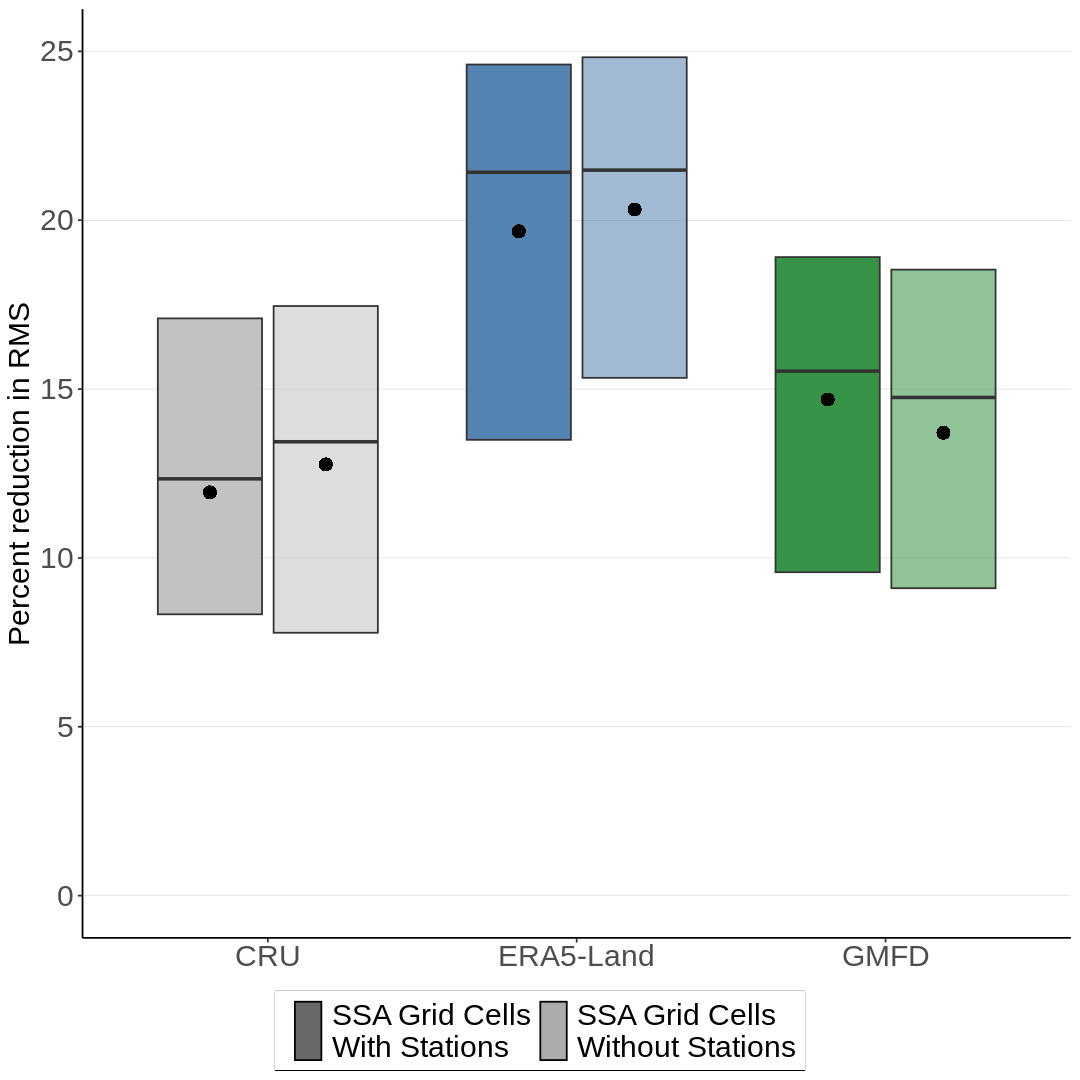

In [119]:
plot = plot_ssa_rms(out)
plot

In [120]:
ggsave(glue('{CODE}/results/figures/Fig4_out_of_sample_SSA.pdf'), plot=plot, width=8, height=8)